<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_12_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library dasar
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # untuk 3D plot
# Agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
y = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns=['diagnosis'])

In [9]:
print("Nama Kelas: M (1), B (0)")
y.value_counts()

Nama Kelas: M (1), B (0)


,count
diagnosis,
0,357
1,212


In [10]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
display(X.head())
display(y.head())


Shape of X: (569, 31)
Shape of y: (569,)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis
0,1
1,1
2,1
3,1
4,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (455, 31)
Shape X_test: (114, 31)
Shape y_train: (455,)
Shape y_test: (114,)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of X_train_scaled:")
display(X_train_scaled[:5])
print("First 5 rows of X_test_scaled:")
display(X_test_scaled[:5])

First 5 rows of X_train_scaled:


array([[-2.43221088e-01,  5.18558727e-01,  8.91825791e-01,
         4.24631702e-01,  3.83925436e-01, -9.74743706e-01,
        -6.89771505e-01, -6.88586446e-01, -3.98175254e-01,
        -1.03915470e+00, -8.25056321e-01, -1.09317755e-01,
        -5.59755400e-02, -2.10096206e-01, -1.59132582e-02,
        -1.00518399e+00, -9.11941990e-01, -6.62815884e-01,
        -6.52561081e-01, -7.01889114e-01, -2.75393571e-01,
         5.79797697e-01,  1.31324246e+00,  4.66908134e-01,
         4.45982711e-01, -5.96154777e-01, -6.34722227e-01,
        -6.10227299e-01, -2.35743918e-01,  5.45663235e-02,
         2.18367276e-02],
       [ 4.08373367e-01, -5.16364088e-01, -1.63971029e+00,
        -5.41348716e-01, -5.42961327e-01,  4.76219058e-01,
        -6.31833818e-01, -6.04281166e-01, -3.03074908e-01,
         5.21543093e-01, -4.54522896e-01, -6.04377961e-01,
        -1.00104604e+00, -5.85429002e-01, -4.93453793e-01,
         4.03212009e-01, -7.68173276e-01, -4.79187222e-01,
         1.14508478e-01, -1.42

First 5 rows of X_test_scaled:


array([[-0.24307384, -0.77089916, -2.00602473, -0.76451652, -0.71183971,
        -0.1583148 , -0.68680034, -0.66248612, -0.57475415, -0.53582061,
        -0.22760708, -0.93280815, -1.37244026, -0.85278289, -0.6368401 ,
        -0.2999339 , -0.56993036, -0.53250895, -0.83258923, -0.8416237 ,
        -0.59337276, -0.72135781, -1.63595077, -0.70654903, -0.65337009,
         0.96851866, -0.10446758, -0.30668651, -0.38805702,  0.16254727,
         0.06095804],
       [-0.24292425,  1.89472636,  0.96648861,  1.89081582,  1.95660534,
         0.32930383,  1.05411572,  2.23036133,  2.06812735,  1.4123358 ,
        -0.53638493,  2.04514286, -0.71973622,  1.63167503,  1.99915055,
        -0.56541094,  0.78141602,  1.99285843,  1.10617549,  0.4316475 ,
         0.47010788,  1.88503847,  0.18033071,  1.68254649,  1.92439305,
        -0.46825232,  0.38976262,  2.00126206,  1.42292627,  0.33722232,
        -0.31041892],
       [-0.24280075,  0.56051506, -0.78108791,  0.57044007,  0.35809371,
       

In [13]:
target_names = ['B', 'M']

# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=target_names))

Akurasi SVM tanpa PCA: 0.9649122807017544

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [14]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape)
print("Shape X_test_pca:", X_test_pca.shape)

Shape X_train_pca: (455, 7)
Shape X_test_pca: (114, 7)


In [15]:
explained_variance = pca.explained_variance_ratio_
print("Variansi yang dijelaskan oleh setiap komponen PCA:", explained_variance)
print("Total variansi yang dijelaskan 7 komponen pertama:", explained_variance.sum())

Variansi yang dijelaskan oleh setiap komponen PCA: [0.43184634 0.17962517 0.0935514  0.06382598 0.05447652 0.03982746
 0.03105096]
Total variansi yang dijelaskan 7 komponen pertama: 0.8942038314851807


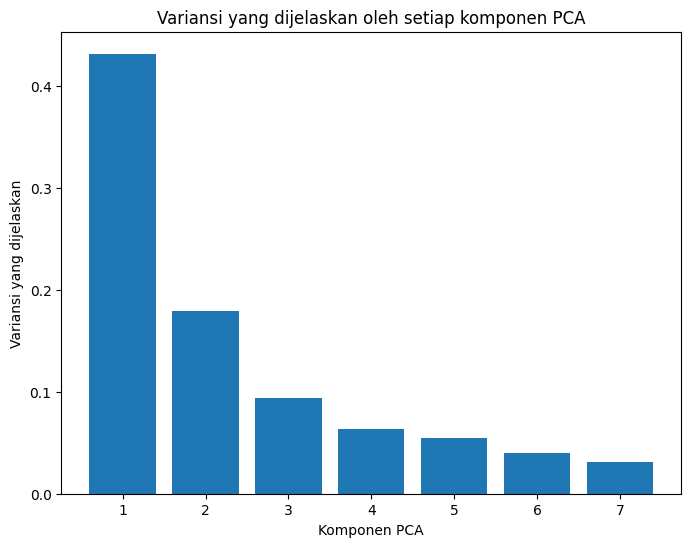

In [16]:
plt.bar([1,2,3,4,5,6,7], explained_variance)
plt.xlabel('Komponen PCA')
plt.ylabel('Variansi yang dijelaskan')
plt.title('Variansi yang dijelaskan oleh setiap komponen PCA')
plt.show()

In [17]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (7 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=target_names))

Akurasi SVM dengan PCA (7 komponen): 0.9649122807017544

Classification Report (dengan PCA):
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



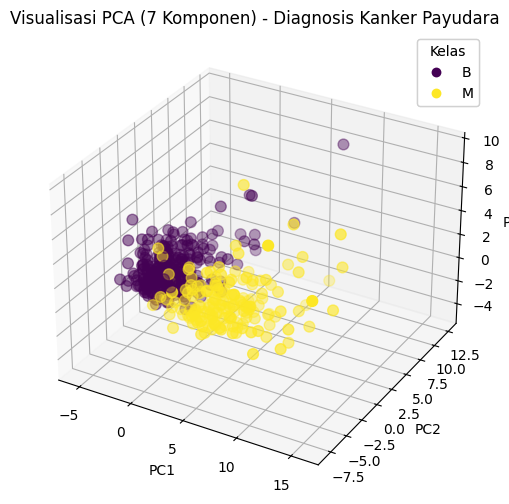

In [18]:
# Visualisasi 3D PCA (menggunakan data train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    cmap='viridis', # Menggunakan colormap untuk perbedaan kelas yang jelas
    s=60
)

ax.set_title('Visualisasi PCA (7 Komponen) - Diagnosis Kanker Payudara')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Tambahkan legend berdasarkan kelas
# Mengganti angka 0 dan 1 dengan 'B' dan 'M' untuk legend
handles, labels = scatter.legend_elements()
legend_labels = []
for label_str in labels:
    # Ekstrak digit dari string LaTeX
    digit_char = label_str.replace(r'$\mathdefault{', '').replace('}$', '')
    index = int(digit_char)
    legend_labels.append(target_names[index])
legend1 = ax.legend(handles, legend_labels, title="Kelas")
ax.add_artist(legend1)
plt.show()

In [19]:
# Membandingkan hasil model tanpa PCA dan dengan PCA
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, explained_variance.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,31,0.964912,NaN
1,SVM Dengan PCA (3 Komponen),7,0.964912,0.894204


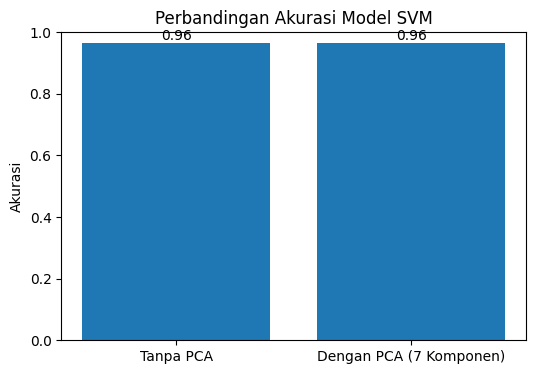

In [20]:
# Visualisasi Grafik:
plt.figure(figsize=(6,4))
plt.bar(['Tanpa PCA', 'Dengan PCA (7 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1) # Skala y dari 0 sampai 1

for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()